In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
vessel_positions_df = pd.read_csv('vessel_positions.csv')
vessel_char_df = pd.read_csv('vessel_characteristics.csv')

C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\2070354544.py:1: DtypeWarning: Columns (20,21,25,26,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  vessel_positions_df = pd.read_csv('vessel_positions.csv')
C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\2070354544.py:2: DtypeWarning: Columns (42,47,72,81,154,163,210) have mixed types. Specify dtype option on import or set low_memory=False.
  vessel_char_df = pd.read_csv('vessel_characteristics.csv')


In [ ]:
vessel_positions_df.head()

In [ ]:
vessel_positions_df.dtypes

In [ ]:
vessel_char_df.head()

In [ ]:
vessel_char_df.dtypes

In [9]:
print("Shape of Vessel Positions: ",vessel_positions_df.shape)
print("Shape of Vessel Charactersitics: ",vessel_char_df.shape)

Shape of Vessel Positions:  (71635, 54)
Shape of Vessel Charactersitics:  (14757, 212)


In [ ]:
print('Null values in Vessel Characteristics: ')
vessel_char_df.isnull().sum()

### Drop the features which have all null values

In [5]:
vessel_char_df = vessel_char_df.dropna(axis=1, how='all')

### Drop the features which have only 1 non null value

In [6]:
non_null_counts = vessel_char_df.notnull().sum()

features_one_value = non_null_counts[non_null_counts == 1].index.tolist()

vessel_char_df = vessel_char_df.drop(columns=features_one_value)

In [ ]:
vessel_char_df.dtypes

- Columns where all values are null
- Analyze features with only one value
- Convert dates 

In [27]:
vessel_positions_df.dtypes

index                                int64
imo                                  int64
vessel_dwt                           int64
status_date_time                    object
in_blackout                          int64
ais_speed                          float64
ais_draft                          float64
vessel_speed_ratio                 float64
ais_lat                            float64
ais_long                           float64
vessel_draft_status                 object
zone_id                            float64
zone_name                           object
zone_entry_time                     object
zone_out_time                       object
updated_at                          object
country_id                         float64
country_name                        object
port_id                            float64
port_name                           object
port_entry_time                     object
port_out_time                       object
operation_location_id              float64
operation_l

## Univariate Analysis

C:\Users\Mustafa Ashraf\AppData\Local\Temp\ipykernel_25984\253830333.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vessel_draft_status', data=vessel_positions_df, palette='pastel')


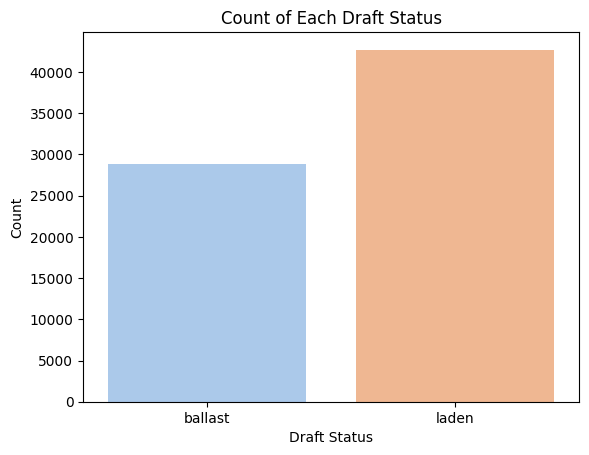

In [13]:
sns.countplot(x='vessel_draft_status', data=vessel_positions_df, palette='pastel')

plt.xlabel('Draft Status')
plt.ylabel('Count')
plt.title('Count of Each Draft Status')
plt.show()

We can see that draft status are divided into two categories: ballast and laden. Majority of the vessels have the laden draft status

<Axes: xlabel='ais_speed', ylabel='Count'>

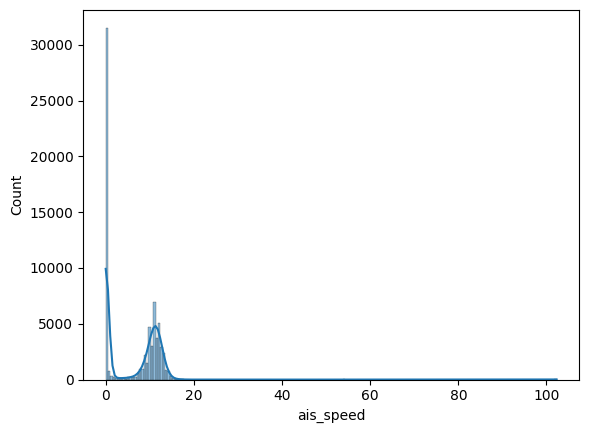

In [8]:
sns.histplot(vessel_positions_df['ais_speed'], kde=True)

In [9]:
vessel_positions_df['ais_speed'].describe()

count    71635.000000
mean         6.060473
std          6.414644
min          0.000000
25%          0.000000
50%          8.000000
75%         11.200000
max        102.300000
Name: ais_speed, dtype: float64

An initial analysis of ais_speed feature seems to be right skewed as there seems toe be vessels with ais_speed of 102.3 knots. This is due to some vessels moving faster than others. We can also see that on average vessels travel at 6.06 knots and have a standard deviation of 6.41 knots.

<Axes: xlabel='ais_draft', ylabel='Count'>

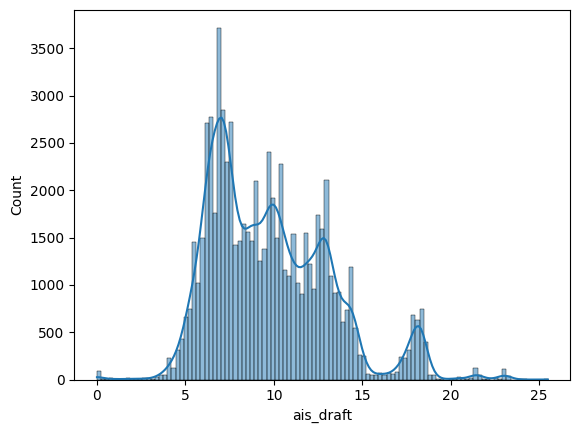

In [10]:
sns.histplot(vessel_positions_df['ais_draft'], kde=True)

In [12]:
vessel_positions_df['ais_draft'].describe()

count    71635.000000
mean         9.759088
std          3.408379
min          0.000000
25%          7.100000
50%          9.200000
75%         12.000000
max         25.500000
Name: ais_draft, dtype: float64

The distribution of the drafts is multimodal with a major peak between 6-7 meters and minor peaks at 9-11 meters, 12-13 meters, and 17-18 meters. The maximum draft is 25.5 meters and the minimum is 0 meters. On average a vessel has a draft of 9.759 meters and standard deviation of 3.408 meters.

## Bivariate Analysis

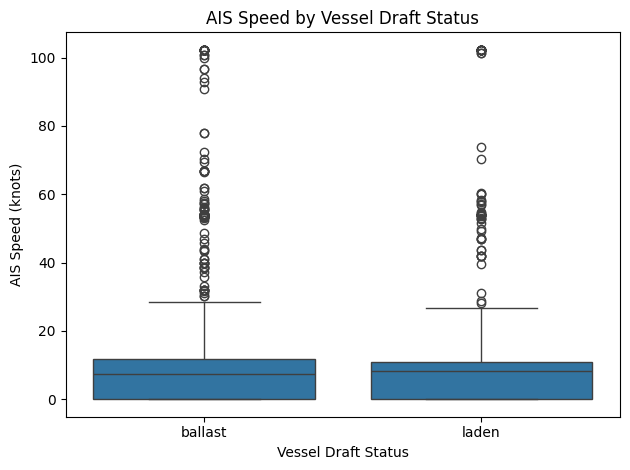

In [21]:
sns.boxplot(x='vessel_draft_status', y='ais_speed', data=vessel_positions_df)

plt.xlabel('Vessel Draft Status')
plt.ylabel('AIS Speed (knots)')
plt.title('AIS Speed by Vessel Draft Status')
plt.tight_layout()
plt.show()

The distribution of speed and vessel draft status does not differ too much between the two draft statuses. Both ballast and laden have similar distribution within the perecentiles, however ballast has more outliers

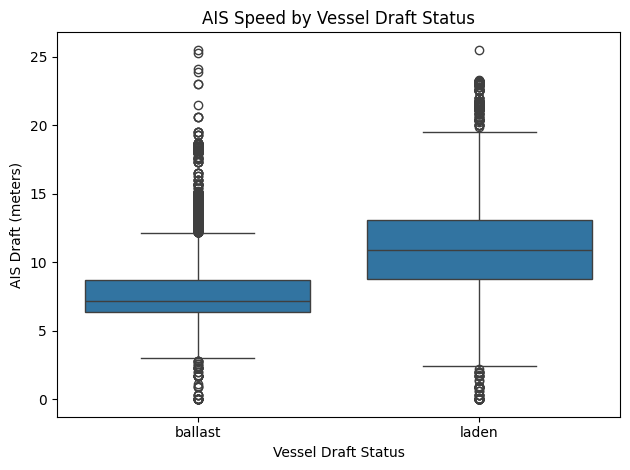

In [22]:
sns.boxplot(x='vessel_draft_status', y='ais_draft', data=vessel_positions_df)

plt.xlabel('Vessel Draft Status')
plt.ylabel('AIS Draft (meters)')
plt.title('AIS Speed by Vessel Draft Status')
plt.tight_layout()
plt.show()

There is a significant distribution between the drafts of the two vessel draft statuses. Most vessels with a ballast draft status tend to have a tighter distribution in their drafts compared to laden. Additionally, on average, vessels with ballast status are around 6 meters whereas vessels with laden status have 11 meters draft. The outliers for ballast are more spread out than those of laden.